Original Gray pixel values (50:55, 50:55):
 [[219 219 219 219 219]
 [219 219 219 219 219]
 [220 220 220 220 220]
 [220 220 220 220 220]
 [220 220 220 220 220]]
Quantized Gray (4 levels) pixel values:
 [[255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]]


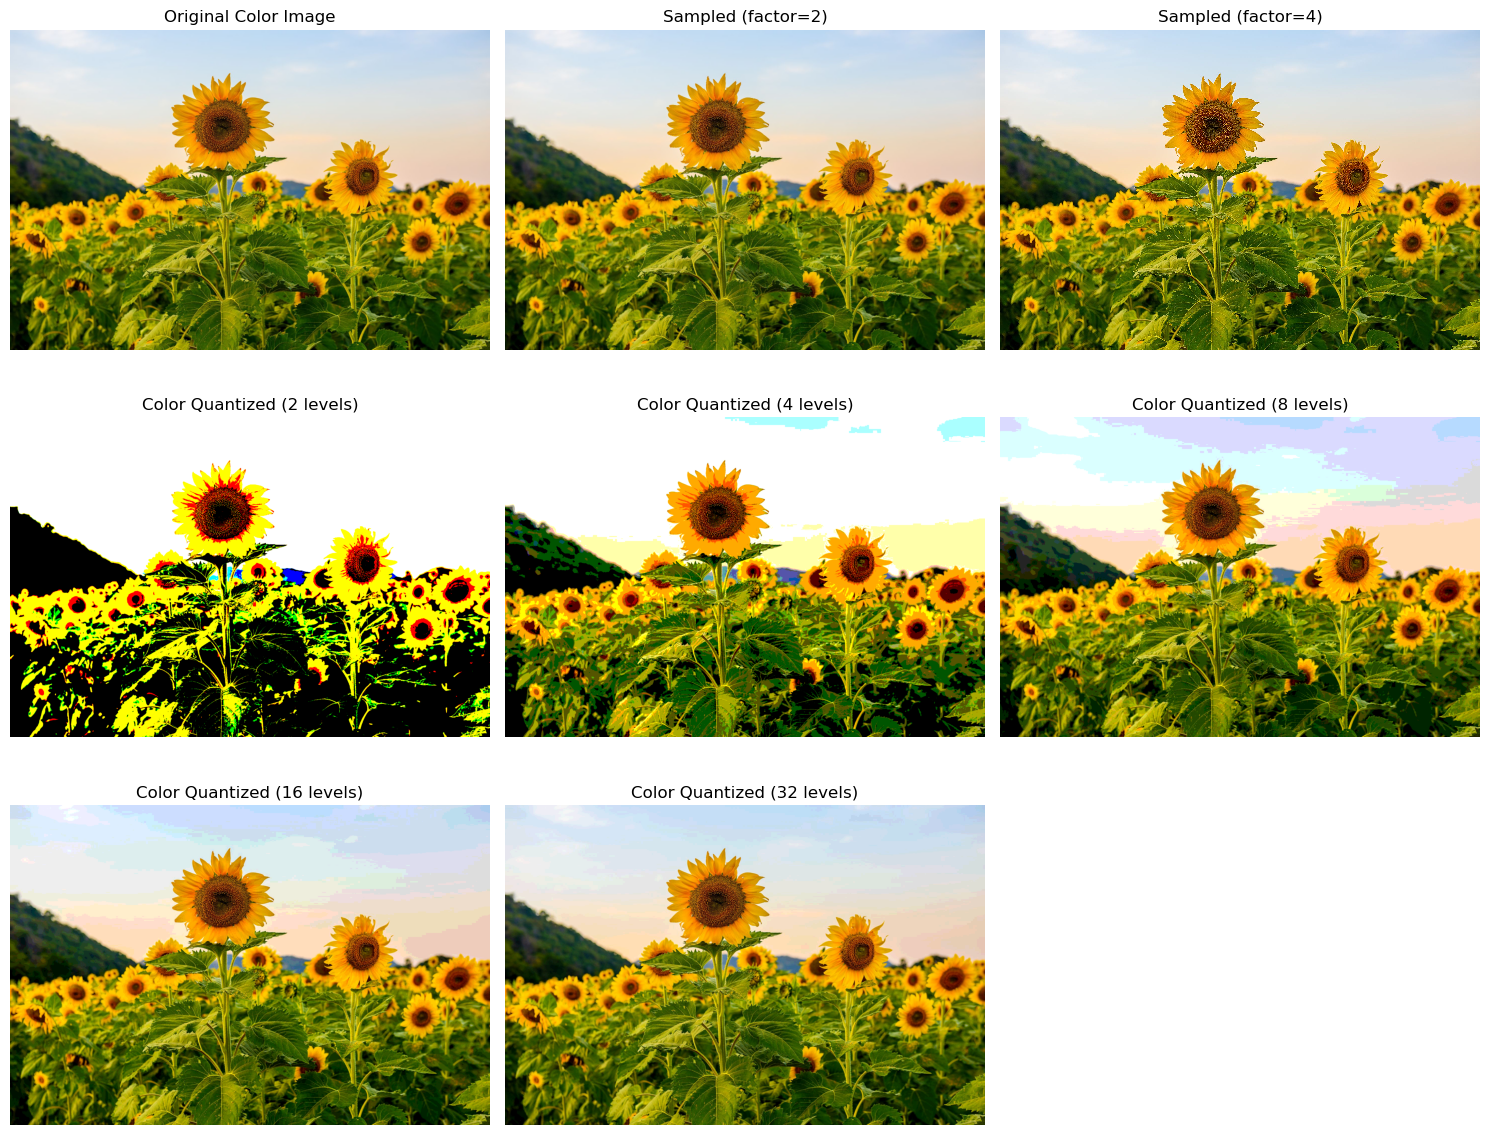

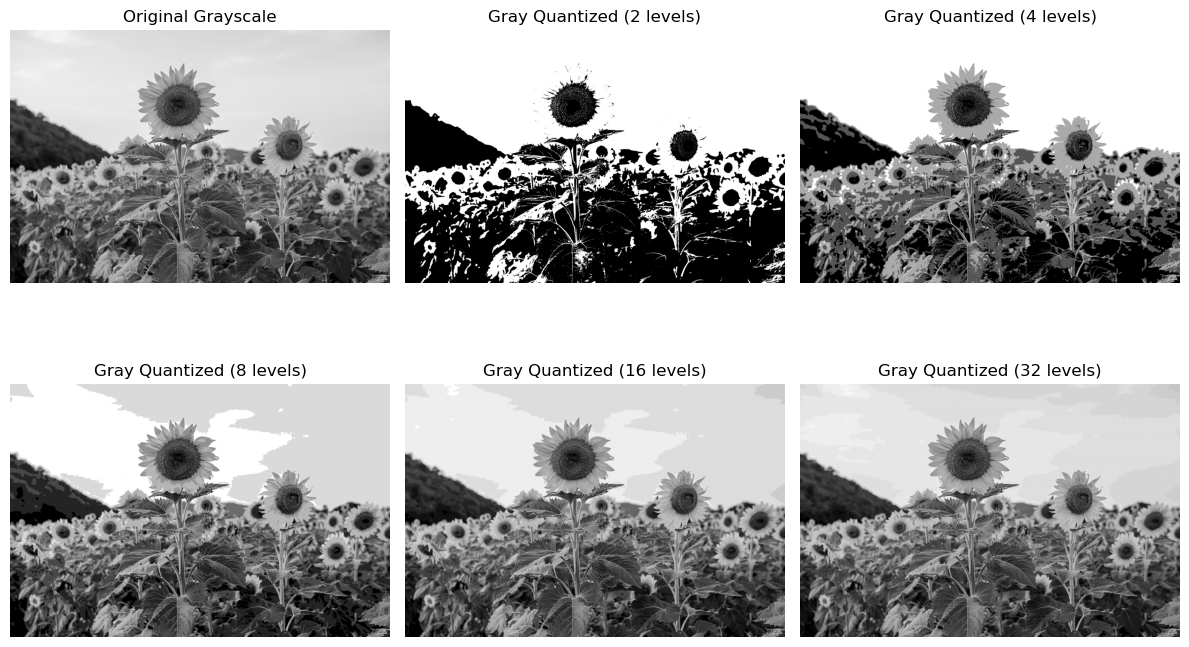

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---- Sampling ----
def image_sampling(img, factor):
    return img[::factor, ::factor]

# ---- Quantization ----
def image_quantization(img, levels):
    # Ensure levels are valid
    if levels < 2:
        raise ValueError("Levels must be >= 2")
    # Divide pixel values into bins
    quantized = np.floor(img / (256 / levels))
    # Rescale back to 0–255 range
    quantized = (quantized * (255 / (levels - 1))).astype(np.uint8)
    return quantized

# ---- Load Image ----
img = cv2.imread("flower.jpg")   # Change path
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# ---- Sampling ----
sampled_2 = image_sampling(img, 2)
sampled_4 = image_sampling(img, 4)

# ---- Quantization (Color) ----
quant_rgb_2 = image_quantization(img, 2)
quant_rgb_4 = image_quantization(img, 4)
quant_rgb_8 = image_quantization(img, 8)
quant_rgb_16 = image_quantization(img, 16)
quant_rgb_32 = image_quantization(img, 32)

# ---- Quantization (Grayscale) ----
quant_gray_2 = image_quantization(img_gray, 2)
quant_gray_4 = image_quantization(img_gray, 4)
quant_gray_8 = image_quantization(img_gray, 8)
quant_gray_16 = image_quantization(img_gray, 16)
quant_gray_32 = image_quantization(img_gray, 32)

# ---- Print Sample Pixel Values ----

print("Original Gray pixel values (50:55, 50:55):\n", img_gray[50:55, 50:55])
print("Quantized Gray (4 levels) pixel values:\n", quant_gray_4[50:55, 50:55])

# ---- Display ----
plt.figure(figsize=(15, 12))

# --- Original & Sampling ---
plt.subplot(3, 3, 1)
plt.imshow(img)
plt.title("Original Color Image")
plt.axis("off")

plt.subplot(3, 3, 2)
plt.imshow(sampled_2)
plt.title("Sampled (factor=2)")
plt.axis("off")

plt.subplot(3, 3, 3)
plt.imshow(sampled_4)
plt.title("Sampled (factor=4)")
plt.axis("off")

# --- Color Quantization ---
plt.subplot(3, 3, 4)
plt.imshow(quant_rgb_2)
plt.title("Color Quantized (2 levels)")
plt.axis("off")

plt.subplot(3, 3, 5)
plt.imshow(quant_rgb_4)
plt.title("Color Quantized (4 levels)")
plt.axis("off")

plt.subplot(3, 3, 6)
plt.imshow(quant_rgb_8)
plt.title("Color Quantized (8 levels)")
plt.axis("off")

plt.subplot(3, 3, 7)
plt.imshow(quant_rgb_16)
plt.title("Color Quantized (16 levels)")
plt.axis("off")

plt.subplot(3, 3, 8)
plt.imshow(quant_rgb_32)
plt.title("Color Quantized (32 levels)")
plt.axis("off")

plt.tight_layout()
plt.show()

# ---- Display Grayscale Quantization ----
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img_gray, cmap="gray")
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(quant_gray_2, cmap="gray")
plt.title("Gray Quantized (2 levels)")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(quant_gray_4, cmap="gray")
plt.title("Gray Quantized (4 levels)")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(quant_gray_8, cmap="gray")
plt.title("Gray Quantized (8 levels)")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(quant_gray_16, cmap="gray")
plt.title("Gray Quantized (16 levels)")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(quant_gray_32, cmap="gray")
plt.title("Gray Quantized (32 levels)")
plt.axis("off")

plt.tight_layout()
plt.show()


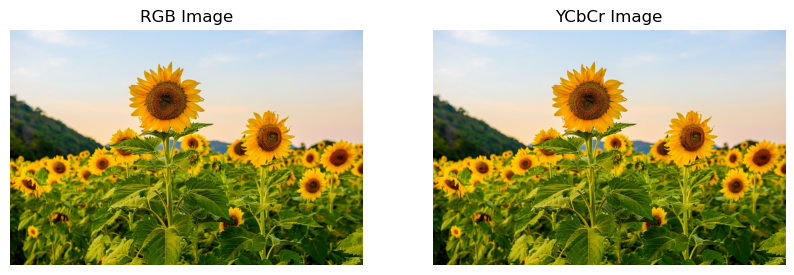

In [5]:
import cv2
import matplotlib.pyplot as plt

# Load the image (BGR format by default in OpenCV)
img = cv2.imread("flower.jpg")

# Convert BGR → RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert RGB → YCbCr (OpenCV uses YCrCb)
img_ycbcr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb)

# Convert back to RGB for display
img_ycbcr_rgb = cv2.cvtColor(img_ycbcr, cv2.COLOR_YCrCb2RGB)

# Display
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("RGB Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_ycbcr_rgb)
plt.title("YCbCr Image")
plt.axis("off")

plt.show()
